## YOLOv5 모델 (PyTorch)

* https://github.com/ultralytics/yolov5
* https://www.ultralytics.com

### 모델 다운로드

In [1]:
%cd /content
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

import torch
from IPython.display import Image, clear_output

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 15679, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 15679 (delta 1), reused 2 (delta 0), pack-reused 15672
Receiving objects: 100% (15679/15679), 14.45 MiB | 19.73 MiB/s, done.
Resolving deltas: 100% (10746/10746), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.5/586.5 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 13.1 MB/s eta 0:00:00


### 추론(Inference)

`detect.py`: YOLOv3 모델을 이용한 추론

In [2]:
!ls data/images

bus.jpg  zidane.jpg


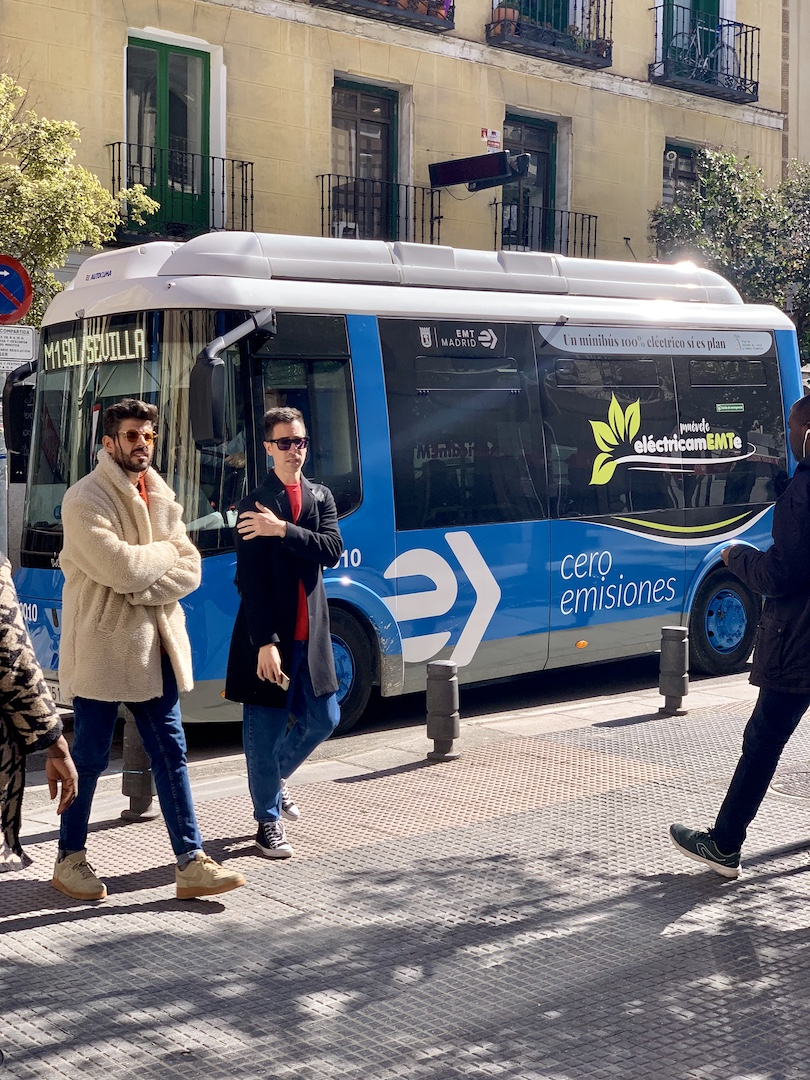

In [3]:
Image(filename='data/images/bus.jpg', width=600)

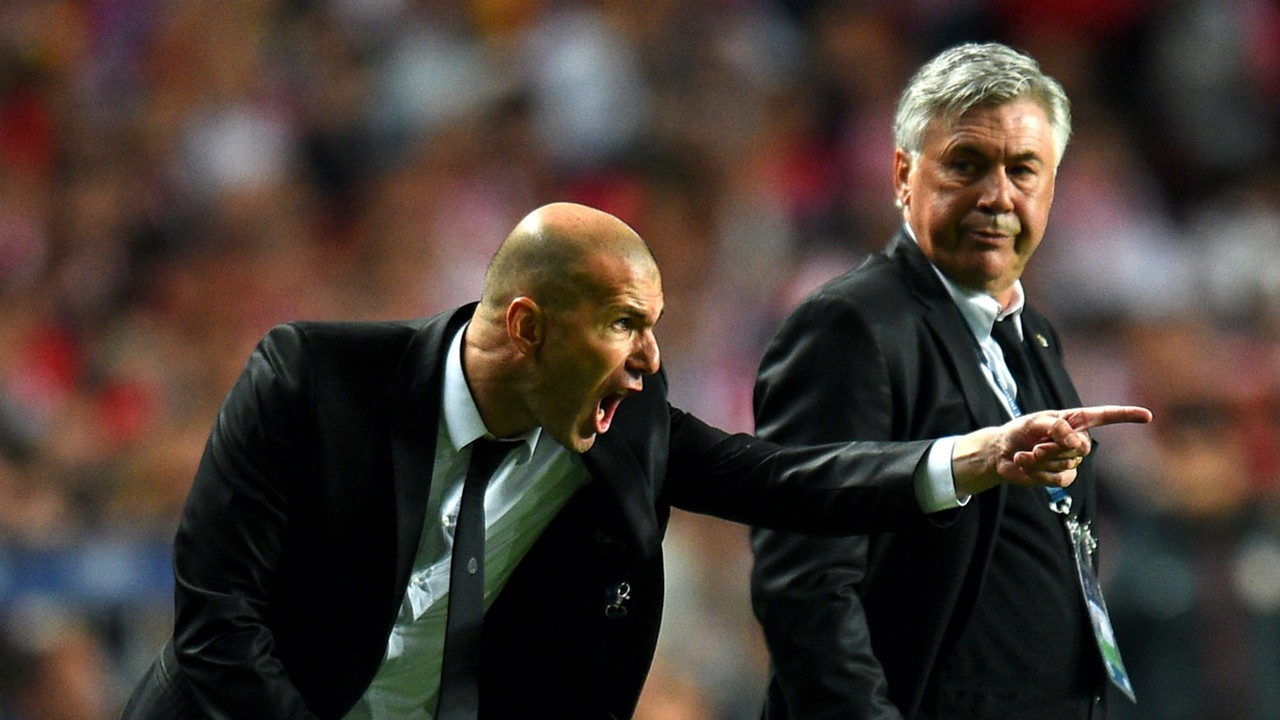

In [4]:
Image(filename='data/images/zidane.jpg', width=600)

In [5]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/

detect: weights=['yolov5s.pt'], source=data/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

100% 14.1M/14.1M [00:00<00:00, 283MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 43.0ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 43.2ms
Speed: 0.5ms pre-process, 43.1ms inference, 20.6ms NMS per image at shape (1, 3, 64

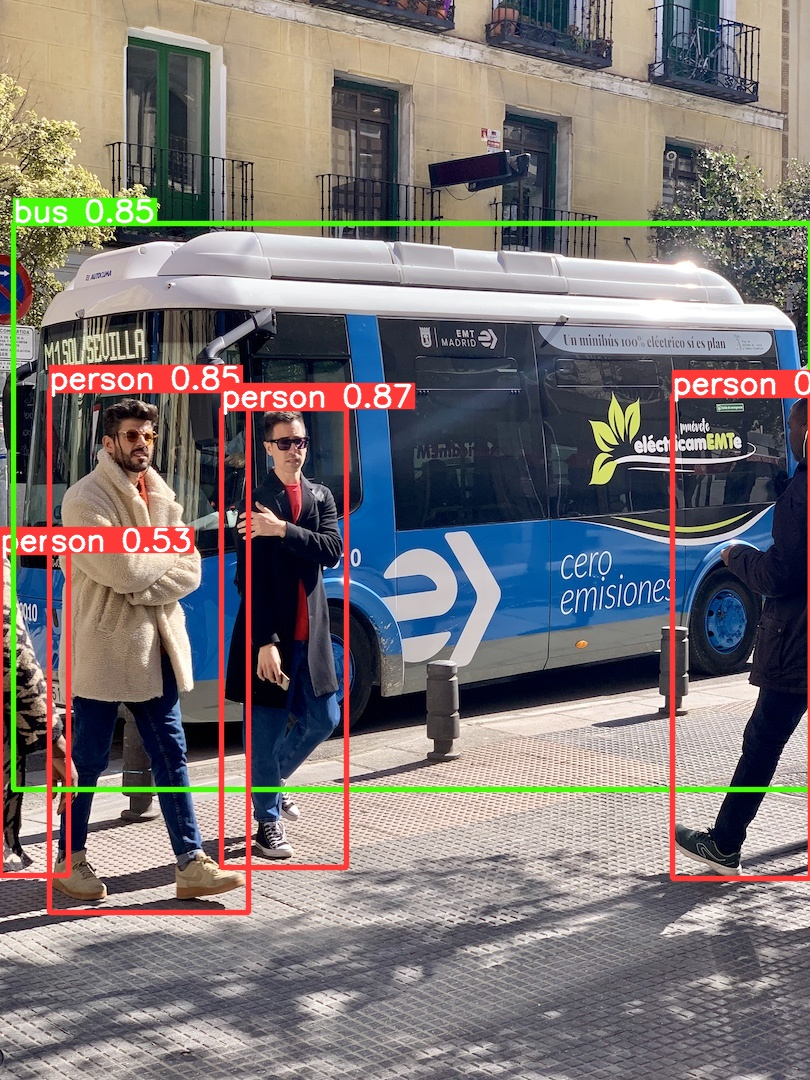

In [6]:
Image(filename='runs/detect/exp/bus.jpg', width=600)

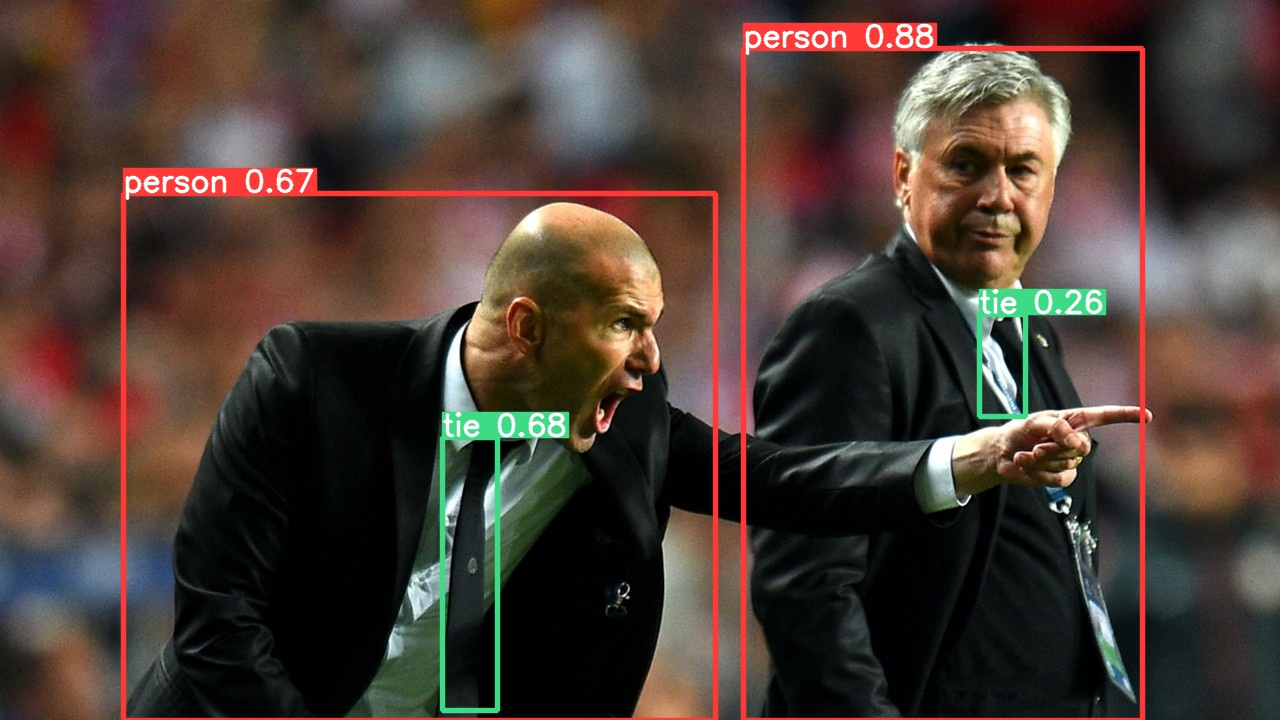

In [7]:
Image(filename='runs/detect/exp/zidane.jpg', width=600)

## 포트홀 탐지 모델

### 데이터셋 다운로드

* 포트홀 데이터셋: https://public.roboflow.com/object-detection/pothole

In [8]:
%mkdir /content/yolov5/pothole
%cd /content/yolov5/pothole
!curl -L "https://public.roboflow.com/ds/Rh0tn3txcV?key=NkEcXuyYQO" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content/yolov5/pothole
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   3647      0 --:--:-- --:--:-- --:--:--  3647
100 46.0M  100 46.0M    0     0  20.7M      0  0:00:02  0:00:02 --:--:-- 32.4M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/img-105_jpg.rf.3fe9dff3d1631e79ecb480ff403bcb86.jpg  
 extracting: test/images/img-107_jpg.rf.2e40485785f6e5e2efec404301b235c2.jpg  
 extracting: test/images/img-146_jpg.rf.61be25b3053a51f622a244980545df2b.jpg  
 extracting: test/images/img-161_jpg.rf.211541e7178a4a93ec0680f26b905427.jpg  
 extracting: test/images/img-168_jpg.rf.af3590e07b06b43e91fa53990ff94af3.jpg  
 extracting: test/images/img-179_jpg.rf.8632eb0d9b75fefe144829e67b75015a.jpg  
 ext

In [9]:
from glob import glob

train_img_list = glob('/content/yolov5/pothole/train/images/*.jpg')
test_img_list = glob('/content/yolov5/pothole/train/images/*.jpg')
valid_img_list = glob('/content/yolov5/pothole/train/images/*.jpg')

print(len(train_img_list), len(test_img_list), len(valid_img_list))

465 465 465


In [10]:
import yaml

with open('/content/yolov5/pothole/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/yolov5/pothole/train.txt', 'w') as f:
  f.write('\n'.join(test_img_list) + '\n')
  
with open('/content/yolov5/pothole/train.txt', 'w') as f:
  f.write('\n'.join(valid_img_list) + '\n')  

In [11]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
  with open(line, 'w') as f:
    f.write(cell.format(**globals()))

In [12]:
%cat /content/yolov5/pothole/data.yaml

train: ../train/images
val: ../valid/images

nc: 1
names: ['pothole']

In [13]:
%%writetemplate /content/yolov5/pothole/data.yaml

train: ./pothole/train/images
test: ./pothole/test/images
val: ./pothole/valid/images

nc: 1
names: ['pothole']

In [14]:
%cat /content/yolov5/pothole/data.yaml


train: ./pothole/train/images
test: ./pothole/test/images
val: ./pothole/valid/images

nc: 1
names: ['pothole']


### 모델 구성

In [15]:
import yaml

with open("/content/yolov5/pothole/data.yaml", 'r') as stream:
  num_classes = str(yaml.safe_load(stream)['nc'])

%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]

In [16]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [17]:
%cat /content/yolov5/models/custom_yolov5s.yaml


# Parameters
nc: 1  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, Fa

### 학습(Training)

* `img`: 입력 이미지 크기 정의
* `batch`: 배치 크기 결정
* `epochs`: 학습 기간 개수 정의
* `data`: yaml 파일 경로
* `cfg`: 모델 구성 지정
* `weights`: 가중치에 대한 경로 지정
* `name`: 결과 이름
* `nosave`: 최종 체크포인트만 저장
* `cache`: 빠른 학습을 위한 이미지 캐시

In [ ]:
%%time
%cd /content/yolov5/
!python train.py --img 640 --batch 32 --epochs 100 --data ./pothole/data.yaml --cfg ./models/custom_yolov5s.yaml --weights '' --name pothole_results --cache

/content/yolov5
train: weights=, cfg=./models/custom_yolov5s.yaml, data=./pothole/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=pothole_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
!ls /content/yolov5/runs/train/pothole_results/

In [ ]:
Image(filename='/content/yolov5/runs/train/pothole_results/results.png', width=1000)

In [ ]:
Image(filename='/content/yolov5/runs/train/pothole_results/train_batch0.jpg', width=1000)

In [ ]:
Image(filename='/content/yolov5/runs/train/pothole_results/val_batch0_labels.jpg', width=1000)

### 검증(Validation)

In [ ]:
!python val.py --weights runs/train/pothole_results/weights/best.pt --data ./pothole/data.yaml --img 640 --iou 0.65 --half

In [ ]:
!python val.py --weights runs/train/pothole_results/weights/best.pt --data ./pothole/data.yaml --img 640 --task test

### 추론(Inference)

In [ ]:
%ls runs/train/pothole_results/weights

In [ ]:
!python detect.py --weights runs/train/pothole_results/weights/best.pt --img 640 --conf 0.4 --source ./pothole/test/images

In [ ]:
import glob
import random
from IPython.display import Image, display

image_name = random.choice(glob.glob('/content/yolov5/runs/detect/exp2/*.jpg'))  # /content/yolov5/pothole/train/images/*.jpg
display(Image(filename=image_name))

### 모델 내보내기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%mkdir /content/drive/My\ Drive/pothole
%cp /content/yolo5/runs/train/pothole_results/weights/best.pt /content/drive/My\ Drive/pothole

## 연기 탐지 모델

### 데이터셋 다운로드

* 연기 데이터셋: https://public.roboflow.com/object-detection/wildfire-smoke/

In [ ]:
%mkdir /content/yolov5/smoke
%cd /content/yolov5/smoke
!curl -L "https://public.roboflow.com/ds/syW0QlY8is?key=3XpT2yoxRM" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
from glob import glob

train_img_list = glob('/content/yolov5/smoke/train/images/*.jpg')
test_img_list = glob('/content/yolov5/smoke/test/images/*.jpg')
valid_img_list = glob('/content/yolov5/smoke/valid/images/*.jpg')

print(len(train_img_list), len(test_img_list), len(valid_img_list))

In [ ]:
import yaml

with open('/content/yolov5/smoke/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/yolov5/smoke/test.txt', 'w') as f:
  f.write('\w'.join(test_img_list) + '\n')

with open('/content/yolov5/smoke/val.txt', 'w') as f:
  f.write('\n'.join(valid_img_list) + '\n')

In [ ]:
%cat /content/yolov5/smoke/data.yaml

In [ ]:
%%writetemplate /content/yolov5/smoke/data.yaml

train: ./smoke/train/images
test: ./smoke/test/images 
val: ./smoke/valid/images

nc: 1
names: ['smoke']

In [ ]:
%cat /content/yolov5/smoke/data.yaml

### 모델 구성

In [ ]:
import yaml

with open("/content/yolov5/smoke/data.yaml", 'r') as stream:
  num_classes = str(yaml.safe_load(stream)['nc'])

%cat /content/yolov5/models/yolov5s.yaml

In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml


# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [ ]:
%cat /content/yolov5/models/custom_yolov5s.yaml

### 학습(Training)

* `img`: 입력 이미지 크기 정의
* `batch`: 배치 크기 결정
* `epochs`: 학습 기간 개수 정의
* `data`: yaml 파일 경로
* `cfg`: 모델 구성 지정
* `weights`: 가중치에 대한 경로 지정
* `name`: 결과 이름
* `nosave`: 최종 체크포인트만 저장
* `cache`: 빠른 학습을 위한 이미지 캐시

In [ ]:
%%time
%cd /content/yolov5
!python train.py --img 640 --batch 32 --epochs 100 --data ./smoke/data.yaml --cfg ./models/custom_yolov5s.yaml --weights '' --name smoke_results --cache

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
!ls runs/train/smoke_results

In [ ]:
Image(filename='runs/train/smoke_results/results.png', width=1000)

In [ ]:
Image(filename='runs/train/smoke_results/train_batch0.jpg', width=1000)

In [ ]:
Image(filename='runs/train/smoke_results/val_batch0_labels.jpg', width=1000)

### 검증(Validation)

In [ ]:
!python val.py --weights runs/train/smoke_results/weights/best.pt --data ./smoke/data.yaml --img 640 --iou 0.65 --half

In [ ]:
!python val.py --weights runs/train/smoke_results/weights/best.pt --data ./smoke/data.yaml --img 640 --task test

### 추론(Inference)

In [ ]:
!python detect.py --weights runs/train/smoke_results/weights/best.pt --img 640 --conf 0.4 --source ./smoke/test/images

In [ ]:
import glob

image_name = random.choice(glob.glob('runs/detect/exp3/*.jpg'))
display(Image(filename=image_name))

### 모델 내보내기

In [ ]:
%mkdir /content/drive/My\ Drive/smoke/
%cp runs/train/smoke_results/weights/best.pt /content/drive/My\ Drive/smoke/

## 안전모 탐지 모델

### 데이터셋 다운로드

* 안전모 데이터셋: https://public.roboflow.com/object-detection/hard-hat-workers

In [ ]:
%mkdir /content/yolov5/hardhat
%cd /content/yolov5/hardhat
!curl -L "https://public.roboflow.com/ds/Wx8Z23YHmT?key=8hV1KTBqY4" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
from glob import glob

train_img_list = glob('/content/yolov5/hardhat/train/images/*.jpg')
test_img_list = glob('/content/yolov5/hardhat/test/images/*.jpg')
print(len(train_img_list), len(test_img_list))

In [ ]:
from sklearn.model_selection import train_test_split

test_img_list, val_img_list = train_test_split(test_img_list, test_size=0.5, random_state=777)
print(len(test_img_list), len(val_img_list))

In [ ]:
import yaml

with open('/content/yolov5/hardhat/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/yolov5/hardhat/test.txt', 'w') as f:
  f.write('\n'.join(test_img_list) + '\n')

with open('/content/yolov5/hardhat/val.txt', 'w') as f:
  f.write('\n'.join(val_img_list) + '\n')

In [ ]:
%cat /content/yolov5/hardhat/data.yaml

In [ ]:
%%writetemplate /content/yolov5/hardhat/data.yaml

train: ./hardhat/train/images
test: ./hardhat/test/images
val: ./hardhat/test/images

nc: 3
names: ['head', 'helmet', 'person']

In [ ]:
%cat /content/yolov5/hardhat/data.yaml

### 모델 구성

In [ ]:
with open('data.yaml', 'r') as stream:
  num_classes = str(yaml.safe_load(stream)['nc'])

%cat /content/yolov5/models/yolov5s.yaml

In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [ ]:
%cat /content/yolov5/models/custom_yolov5s.yaml

### 학습(Training)

* `img`: 입력 이미지 크기 정의
* `batch`: 배치 크기 결정
* `epochs`: 학습 기간 개수 정의
* `data`: yaml 파일 경로
* `cfg`: 모델 구성 지정
* `weights`: 가중치에 대한 경로 지정
* `name`: 결과 이름
* `nosave`: 최종 체크포인트만 저장
* `cache`: 빠른 학습을 위한 이미지 캐시

In [ ]:
%time
%cd /content/yolov5
!python train.py --img 416 --batch 64 --epochs 50 --data ./hardhat/data.yaml --cfg ./models/custom_yolov5s.yaml --weights '' --name hardhat_results --cache

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
!ls runs/train/hardhat_results

In [ ]:
Image(filename='runs/train/hardhat_results/results.png', width=1000)

In [ ]:
Image(filename='runs/train/hardhat_results/train_batch0.jpg', width=1000)

In [ ]:
Image(filename='runs/train/hardhat_results/val_batch0_labels.jpg', width=1000)

### 검증(Validation)

In [ ]:
!python val.py --weights runs/train/hardhat_results/weights/best.pt --data ./hardhat/data.yaml --img 416 --iou 0.65 --half

In [ ]:
!python val.py --weights runs/train/hardhat_results/weights/best.pt --data ./hardhat/data.yaml --img 416 --task test

### 추론(Inference)

In [ ]:
%ls runs/train/hardhat_results/weights

In [ ]:
!python detect.py --weights runs/train/hardhat_results/weights/best.pt --img 416 --conf 0.4 --source ./hardhat/test/images

In [ ]:
import glob

image_name = random.choice(glob.glob('runs/detect/exp4/*.jpg'))
display(Image(filename=image_name))

### 모델 내보내기

In [ ]:
%mkdir /content/drive/My\ Drive/hardhat
%cp runs/train/hardhat_results/weights/best.pt /content/drive/My\ Drive/hardhat

## 주차공간 탐지 모델

### 데이터셋 다운로드

* 주차공간 데이터셋: https://public.roboflow.com/object-detection/pklot

In [ ]:
%mkdir /content/yolov5/pklot
%cd /content/yolov5/pklot

!curl -L "https://public.roboflow.com/ds/VbuPUdVLf8?key=I4DWxN2DqD" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
from glob import glob

train_img_list = glob('/content/yolov5/pklot/train/images/*.jpg')
test_img_list = glob('/content/yolov5/pklot/test/images/*.jpg')
valid_img_list = glob('/content/yolov5/pklot/valid/images/*.jpg')

print(len(train_img_list), len(test_img_list), len(valid_img_list))

In [ ]:
import yaml

with open('/content/yolov5/pklot/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/yolov5/pklot/test.txt', 'w') as f:
  f.write('\n'.join(test_img_list) + '\n')

with open('/content/yolov5/pklot/val.txt', 'w') as f:
  f.write('\n'.join(valid_img_list) + '\n')

In [ ]:
%cat /content/yolov5/pklot/data.yaml

In [ ]:
%%writetemplate /content/yolov5/pklot/data.yaml

train: ./pklot/train/images
test: ./pklot/test/images
val: ./pklot/valid/images

nc: 2
names: ['space-empty', 'space-occupied']

In [ ]:
%cat /content/yolov5/pklot/data.yaml

### 모델 구성

In [ ]:
with open('data.yaml', 'r') as stream:
  num_classes = str(yaml.safe_load(stream)['nc'])

%cat /content/yolov5/models/yolov5s.yaml

In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# Parameters
nc: {num_classes} # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [ ]:
%cat /content/yolov5/models/custom_yolov5s.yaml

### 학습(Training)

* `img`: 입력 이미지 크기 정의
* `batch`: 배치 크기 결정
* `epochs`: 학습 기간 개수 정의
* `data`: yaml 파일 경로
* `cfg`: 모델 구성 지정
* `weights`: 가중치에 대한 경로 지정
* `name`: 결과 이름
* `nosave`: 최종 체크포인트만 저장
* `cache`: 빠른 학습을 위한 이미지 캐시

In [ ]:
%time
%cd /content/yolov5/
!python train.py --img 640 --batch 32 --epochs 50 --data ./pklot/data.yaml --cfg ./models/custom_yolov5s.yaml --weights '' --name pklot_results --cache

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
!ls runs/train/pklot_results/

In [ ]:
Image(filename='runs/train/pklot_results/results.png', width=1000)

In [ ]:
Image(filenama='runs/train/pklot_results/train_batch0.jpg', width=1000)

In [ ]:
Image(filenama='runs/train/pklot_results/val_batch0_labels.jpg', width=1000)

### 검증(Validation)

In [ ]:
!python val.py --weights runs/train/pklot_results/weights/best.pt --data ./pklot/data.yaml --img 640 --iou 0.65 --half

In [ ]:
!python val.py --weights runs/train/pklot_results/weights/best.pt --data ./pklot/data.yaml --img 640 --task test

### 추론(Inference)

In [ ]:
!python detect.py --weights runs/train/pklot_results/weights/best.pt --img 640 --conf 0.4 --source ./pklot/test/images/

In [ ]:
import glob

image_name = random.choice(glob.glob('runs/detect/exp5/*.jpg'))
display(image(filename=image_name))

### 모델 내보내기

In [ ]:
%mkdir /content/drive/My\ Drive/pklot/
%cp /content/yolov5/runs/train/pklot_results/weights/best.pt /content/drive/My\ Drive/pklot/